In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import csv
import pandas
from scipy.signal import find_peaks
from scipy.optimize import curve_fit

from iminuit import Minuit
from iminuit.cost import LeastSquares

print("finished importing libraries")

finished importing libraries


In [2]:
df = pandas.read_csv('~/Desktop/Python_files/lab_data_1/data1_1.csv')
print(df)

                       LECROYWS3034z               45662  Waveform
Segments                           1         SegmentSize   10002.0
Segment                     TrigTime   TimeSinceSegment1       NaN
#1              27-Mar-2022 01:41:02  0                        NaN
Time                            Ampl                 NaN       NaN
-5.000739e-006             -0.993333                 NaN       NaN
...                              ...                 ...       ...
4.996261e-006              -0.993333                 NaN       NaN
4.997261e-006              -0.993333                 NaN       NaN
4.998261e-006              -0.993333                 NaN       NaN
4.999261e-006              -0.993333                 NaN       NaN
5.000261e-006              -0.993333                 NaN       NaN

[10006 rows x 3 columns]


In [3]:
df.columns

Index(['LECROYWS3034z', '45662', 'Waveform'], dtype='object')

In [4]:
df

,LECROYWS3034z,45662,Waveform
Segments,1,SegmentSize,10002.0
Segment,TrigTime,TimeSinceSegment1,NaN
#1,27-Mar-2022 01:41:02,0,NaN
Time,Ampl,NaN,NaN
-5.000739e-006,-0.993333,NaN,NaN
...,...,...,...
4.996261e-006,-0.993333,NaN,NaN
4.997261e-006,-0.993333,NaN,NaN
4.998261e-006,-0.993333,NaN,NaN
4.999261e-006,-0.993333,NaN,NaN


In [5]:
df.LECROYWS3034z

Segments                             1
Segment                       TrigTime
#1                27-Mar-2022 01:41:02
Time                              Ampl
-5.000739e-006               -0.993333
                          ...         
4.996261e-006                -0.993333
4.997261e-006                -0.993333
4.998261e-006                -0.993333
4.999261e-006                -0.993333
5.000261e-006                -0.993333
Name: LECROYWS3034z, Length: 10006, dtype: object

In [6]:
amp = np.array(df.LECROYWS3034z.values[4:], dtype=np.float64)
time = np.array(df.LECROYWS3034z.axes[0][4:], dtype=np.float64)

In [7]:
print(find_peaks(amp, height=(-.6,0)))

(array([4203, 5010, 5014]), {'peak_heights': array([-0.0333333, -0.04     , -0.0333333])})


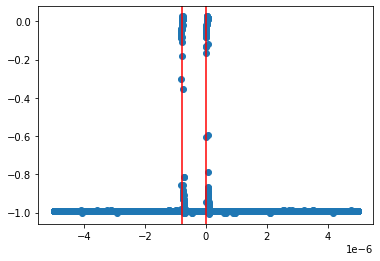

In [8]:
plt.scatter(time, amp)
# plt.xlim(-0.25, 0.25)
# plt.ylim(-1.2,0.2)

border = .2
index, _ = find_peaks(amp, height=(-.6,0))
# plt.plot(index, amp[index], "x")
for x in range(2):
    plt.axvline(time[index[x]], color='red')

plt.show()

In [9]:
total_t = 0
for x in range(1,36):
    df_x = pandas.read_csv(f'~/Desktop/Python_files/lab_data_1/data1_{x}.csv')
    amp_x = np.array(df_x.LECROYWS3034z.values[4:], dtype=np.float64)
    time_x = np.array(df_x.LECROYWS3034z.axes[0][4:], dtype=np.float64)
    index_x, _ = find_peaks(amp_x, height=(-.6,0))
    
    tau_x = time_x[index_x[1]] - time_x[index_x[0]]
    total_t += tau_x
    
tau = (total_t/35)
k_factor = 0.974
tau = tau*k_factor

print(tau)

2.677470342857142e-06


In [10]:
total_t = 0
tau_list = []


for x in range(1,36):
    df_x = pandas.read_csv(f'~/Desktop/Python_files/lab_data_1/data1_{x}.csv')
    amp_x = np.array(df_x.LECROYWS3034z.values[4:], dtype=np.float64)
    time_x = np.array(df_x.LECROYWS3034z.axes[0][4:], dtype=np.float64)
    index_x, _ = find_peaks(amp_x, height=(-.6,0))
    
    tau_x = time_x[index_x[1]] - time_x[index_x[0]]
    total_t += tau_x
    # total_t += (tau_x*k_factor)
    tau_list.append(tau_x)
    
for x in range(0,10):
    df_x = pandas.read_csv(f'~/Desktop/Python_files/lab_data_2/C1new_week0000{x}.csv')
    amp_x = np.array(df_x.LECROYWS3034z.values[4:], dtype=np.float64)
    time_x = np.array(df_x.LECROYWS3034z.axes[0][4:], dtype=np.float64)
    index_x, _ = find_peaks(amp_x, height=(-.6,0))
    
    tau_x = time_x[index_x[1]] - time_x[index_x[0]]
    total_t += tau_x
    # total_t += (tau_x*k_factor)
    tau_list.append(tau_x)
    
for x in range(10,100):
    df_x = pandas.read_csv(f'~/Desktop/Python_files/lab_data_2/C1new_week000{x}.csv')
    amp_x = np.array(df_x.LECROYWS3034z.values[4:], dtype=np.float64)
    time_x = np.array(df_x.LECROYWS3034z.axes[0][4:], dtype=np.float64)
    index_x, _ = find_peaks(amp_x, height=(-.6,0))
    
    tau_x = time_x[index_x[1]] - time_x[index_x[0]]
    total_t += tau_x
    # total_t += (tau_x*k_factor)
    tau_list.append(tau_x)
    
for x in range(100,976):
    df_x = pandas.read_csv(f'~/Desktop/Python_files/lab_data_2/C1new_week00{x}.csv')
    amp_x = np.array(df_x.LECROYWS3034z.values[4:], dtype=np.float64)
    time_x = np.array(df_x.LECROYWS3034z.axes[0][4:], dtype=np.float64)
    index_x, _ = find_peaks(amp_x, height=(-.6,0))
    
    tau_x = time_x[index_x[1]] - time_x[index_x[0]]
    total_t += tau_x
    # total_t += (tau_x*k_factor)
    tau_list.append(tau_x)


tau = (total_t/(975+36))

print(tau*k_factor)
# print(tau_list)
#calculate uncertainty (std. dev)

2.2574689910979236e-06


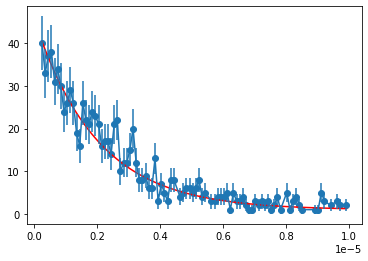

[4.48295240e+01 1.98380134e-06 9.29870062e-01]
[40 33 37 38 31 34 30 24 26 29 26 19 16 26 22 21 24 23 21 16 17 17 14 21
 22 10 12 12 15 20 12  8  8  9  6  6 13  3  7  5  3  8  8  4  5  6  6  5
  6  8  4  5  3  3  4  4  4  5  1  5  3  3  4  2  1  1  3  2  3  2  3  1
  2  4  1  5  1  3  4  2  1  1  1  5  3  2  3  2  2]


In [24]:
def exp_fit(x,a,b,c):
    y=a*np.exp(-x/b)+c
    return y

hist, bins = np.histogram(tau_list, bins=100)
center = (bins[:-1] + bins[1:]) / 2
# print(center)
center = center[2:]
hist = hist[2:]
mask = hist!=0
hist = hist[mask]
center = center[mask]
fit_ = curve_fit(exp_fit,center,hist, p0=[40,2.3e-6,0], sigma=np.sqrt(hist))
fit_eq = fit_[0][0]*np.exp(-center/fit_[0][1])+fit_[0][2]

fig = plt.figure()
ax = fig.subplots()

# ax.hist(tau_list,bins=50)
plt.scatter(center,hist)
# plt.bar(x,hist, alpha = 0.5, align = 'edge', width = 1)
plt.plot(center,fit_eq, color = 'red')
plt.errorbar(center,hist,yerr=np.sqrt(hist),label="data")
plt.show()

print(fit_[0])

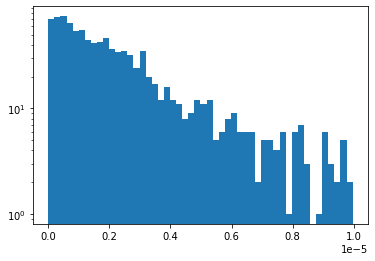

In [12]:
plt.hist(tau_list,bins=50, log=1)
# plt.plot(x_fit,fit_eq, color = 'red')
plt.show()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 67.81 (chi2/ndof = 0.8)    │              Nfcn = 83               │
│ EDM = 6.48e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   44.8    │    2.7    │            │            │         │         │       │
│ 1 │ b    │  1.98e-6  │  0.14e-6  │            │            │         │         │       │
│ 2 │ c    │    0.9    │    0.4    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────┐
│   │         a         b         c │
├───┼───────────────────────────────┤
│ a │      7.38 -2.78e-07     0.336 │
│ b │ -2.78e-07  2.11e-14  -4.3e-08 │
│ c │     0.336  -4.3e-08     0.144 │
└───┴───────────────────────────────┘

ac_rate: 1.0482224346736602


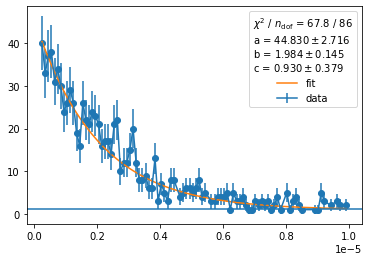

In [36]:
least_squares = LeastSquares(center, hist, np.sqrt(hist), exp_fit)
m = Minuit(least_squares, a=40, b=2.3e-6,c=0)  # starting values for a,b,c
m.migrad()  # finds minimum of least_squares function
m.hesse()   # accurately computes uncertainties
display(m)

plt.scatter(center,hist)
plt.errorbar(center,hist,yerr=np.sqrt(hist),label="data")
plt.plot(center, exp_fit(center, *m.values), label="fit")

# display legend with some fit info
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(center) - m.nfit}",
]

for p, v, e in zip(m.parameters, m.values, m.errors):
    if p=='b':
        v=v*1e6
        e=e*1e6
        tau_fit=v
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
    

plt.legend(title="\n".join(fit_info))

r = (1043/60264)/((11245/59955))
ac_rate = (975+36)*r/len(hist)
print("ac_rate: " + str(ac_rate))
plt.axhline(ac_rate)

plt.savefig("muon_lifetime.png")

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 85.85 (chi2/ndof = 1.0)    │              Nfcn = 53               │
│ EDM = 2.62e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   40.3    │    2.1    │            │            │         │         │       │
│ 1 │ b    │  2.68e-6  │  0.11e-6  │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────────┐
│   │         a         b │
├───┼─────────────────────┤
│ a │      4.61 -1.99e-07 │
│ b │ -1.99e-07  1.28e-14 │
└───┴─────────────────────┘

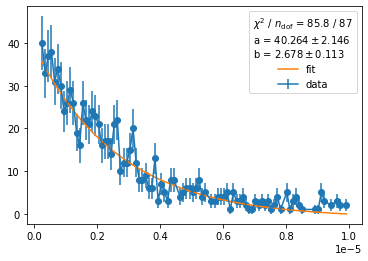

In [14]:
def exp_fit_mod(x,a,b):
    y=a*np.exp(-x/b)-ac_rate
    return y

least_squares = LeastSquares(center, hist, np.sqrt(hist), exp_fit_mod)
m = Minuit(least_squares, a=40, b=2.3e-6)  # starting values for a,b,c
m.migrad()  # finds minimum of least_squares function
m.hesse()   # accurately computes uncertainties
display(m)

plt.scatter(center,hist)
plt.errorbar(center,hist,yerr=np.sqrt(hist),label="data")
plt.plot(center, exp_fit_mod(center, *m.values), label="fit")

# display legend with some fit info
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(center) - m.nfit}",
]

for p, v, e in zip(m.parameters, m.values, m.errors):
    if p=='b':
        v=v*1e6
        e=e*1e6
        tau_fit=v
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
    

plt.legend(title="\n".join(fit_info))

plt.savefig("muon_lifetime_shifted.png")

In [23]:
#number events per bin per lifetime? c*(#bins)/lifetime and compare to 'a' from bkgd fit
for p, v, e in zip(m.parameters, m.values, m.errors):
    if p=='c':
        apx = v

bkgd_apx = v*100/tau_fit
print(bkgd_apx)

1.1195746076029174


In [19]:
# hist2 = np.log(hist)
# print(hist2)
# mask2 = hist2!=0
# hist2 = hist2[mask2]
# center = center[mask2]

def lin_fit(x,a,b):
    y=a-x/b
    return y

# least_squares = LeastSquares(center, hist2, np.sqrt(hist2), lin_fit)
# m = Minuit(least_squares, a=4, b=2.3e-6)  # starting values for a,b,c
# m.migrad()  # finds minimum of least_squares function
# m.hesse()   # accurately computes uncertainties
# display(m)

# plt.scatter(center,hist2)
# plt.errorbar(center,hist2,yerr=np.sqrt(hist2),label="data")
# plt.plot(center, lin_fit(center, *m.values), label="fit")

# # display legend with some fit info
# fit_info = [
#     f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(center) - m.nfit}",
# ]

# for p, v, e in zip(m.parameters, m.values, m.errors):
#     if p=='b':
#         v=v*1e6
#         e=e*1e6
#     fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
    

# plt.legend(title="\n".join(fit_info))

In [20]:
total_t2 = 0
tau_list2 = []


for x in range(10):
    df_x = pandas.read_csv(f'~/Desktop/Python_files/background_data/C1bkgd0000{x}.csv')
    amp_x = np.array(df_x.LECROYWS3034z.values[4:], dtype=np.float64)
    time_x = np.array(df_x.LECROYWS3034z.axes[0][4:], dtype=np.float64)
    index_x, _ = find_peaks(amp_x, height=(-.6,0))
    
    if len(index_x) == 2:
        tau_x = time_x[index_x[1]] - time_x[index_x[0]]
        total_t2 += tau_x
        tau_list2.append(tau_x)

for x in range(10,100):
    df_x = pandas.read_csv(f'~/Desktop/Python_files/background_data/C1bkgd000{x}.csv')
    amp_x = np.array(df_x.LECROYWS3034z.values[4:], dtype=np.float64)
    time_x = np.array(df_x.LECROYWS3034z.axes[0][4:], dtype=np.float64)
    index_x, _ = find_peaks(amp_x, height=(-.6,0))
    
    if len(index_x) == 2:
        tau_x = time_x[index_x[1]] - time_x[index_x[0]]
        total_t2 += tau_x
        tau_list2.append(tau_x)

for x in range(100,522):
    df_x = pandas.read_csv(f'~/Desktop/Python_files/background_data/C1bkgd00{x}.csv')
    amp_x = np.array(df_x.LECROYWS3034z.values[4:], dtype=np.float64)
    time_x = np.array(df_x.LECROYWS3034z.axes[0][4:], dtype=np.float64)
    index_x, _ = find_peaks(amp_x, height=(-.6,0))
    
    if len(index_x) == 2:
        tau_x = time_x[index_x[1]] - time_x[index_x[0]]
        total_t2 += tau_x
        tau_list2.append(tau_x)
    

tau_bkgd = (total_t2/(522))

print(tau_bkgd)

3.2262453371647515e-06


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 16.28 (chi2/ndof = 0.6)    │              Nfcn = 381              │
│ EDM = 0.000117 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   1.78    │   0.26    │            │            │         │         │       │
│ 1 │ b    │    0.0    │    1.7    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬─────────────────┐
│   │       a       b │
├───┼─────────────────┤
│ a │  0.0655 -0.0764 │
│ b │ -0.0764    2.81 │
└───┴─────────────────┘

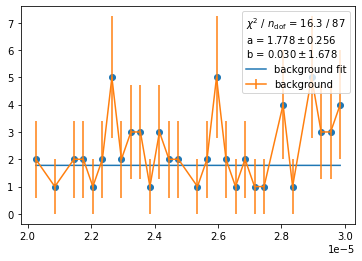

In [21]:
hist_b, bins_b = np.histogram(tau_list2, bins=100)
center_b = (bins_b[:-1] + bins_b[1:]) / 2
# print(center)
center_b = center_b[2:]
hist_b = hist_b[2:]
mask_b = hist_b!=0
hist_b = hist_b[mask_b]
center_b = center_b[mask_b]

fig_b = plt.figure()
ax_b = fig.subplots()

least_squares = LeastSquares(center_b, hist_b, np.sqrt(hist_b), lin_fit)
m = Minuit(least_squares, a=2.5, b=2.3e-6)  # starting values for a,b
m.migrad()  # finds minimum of least_squares function
m.hesse()   # accurately computes uncertainties
display(m)


# ax.hist(tau_list,bins=50)
plt.scatter(center_b,hist_b)
plt.plot(center_b, lin_fit(center_b, *m.values), label="background fit")
plt.errorbar(center_b,hist_b,yerr=np.sqrt(hist_b),label="background")

# display legend with some fit info
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(center) - m.nfit}",
]

for p, v, e in zip(m.parameters, m.values, m.errors):
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
    
    if p=='a':
        bk_c=v

plt.legend(title="\n".join(fit_info))


plt.savefig("muon_background.png")
plt.show()

In [22]:
bkgd = bk_c*100/(tau_fit)

print("Background approximation from exponential fit: " + str(bkgd_apx/59955))
print("Actual background from linear fit: " + str(bkgd/60264))
print("Units: events per microsec per 10us interval\n")

print("Event counts per sec: " + str(11245/59955))
print("Background events per sec: " + str(1043/60264))


Background approximation from exponential fit: 1.6679176048703193e-09
Actual background from linear fit: 0.0011015027838778679
Units: events per microsec per 10us interval

Event counts per sec: 0.1875573346676674
Background events per sec: 0.017307181733705032


background events per bin: 10.168990392273994


┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 67.81 (chi2/ndof = 0.8)    │              Nfcn = 83               │
│ EDM = 6.48e-07 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   44.8    │    2.7    │            │            │         │         │       │
│ 1 │ b    │  1.98e-6  │  0.14e-6  │            │            │         │         │       │
│ 2 │ c    │    0.9    │    0.4    │            │            │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────────────────────┐
│   │         a         b         c │
├───┼───────────────────────────────┤
│ a │      7.38 -2.78e-07     0.336 │
│ b │ -2.78e-07  2.11e-14  -4.3e-08 │
│ c │     0.336  -4.3e-08     0.144 │
└───┴───────────────────────────────┘

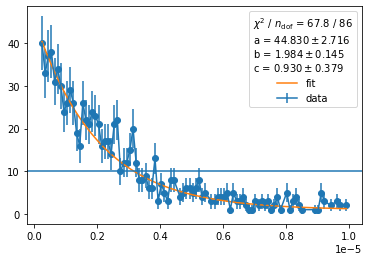

In [37]:
# calculating number of background events; this assumes equal efficiency of trigger

est_bkdg = (1043/(60264*10))*((10-.2)*59955) #estimated number of background events in the data
bkgd_events_per_bin = est_bkdg / 100
print("background events per bin: " + str(bkgd_events_per_bin))


least_squares = LeastSquares(center, hist, np.sqrt(hist), exp_fit)
m = Minuit(least_squares, a=40, b=2.3e-6,c=0)  # starting values for a,b,c
m.migrad()  # finds minimum of least_squares function
m.hesse()   # accurately computes uncertainties
display(m)


plt.scatter(center,hist)
plt.errorbar(center,hist,yerr=np.sqrt(hist),label="data")
plt.plot(center, exp_fit(center, *m.values), label="fit")

# display legend with some fit info
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(center) - m.nfit}",
]

for p, v, e in zip(m.parameters, m.values, m.errors):
    if p=='b':
        v=v*1e6
        e=e*1e6
        tau_fit=v
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
    

plt.legend(title="\n".join(fit_info))

plt.axhline(bkgd_events_per_bin)

plt.savefig("muon_lifetime_2.png")

In [52]:
#calculating background differently:

f1 = (11245/59955) #signal _+ bkgnd
f2 = (1043/60264) #bkgnd

num_b_events_2 = ((975+36)*(f2)*((10-.2)/10)/(f1))/len(hist)
print(num_b_events_2)

1.027257985980187


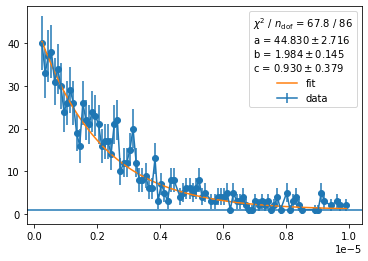

In [51]:
plt.scatter(center,hist)
plt.errorbar(center,hist,yerr=np.sqrt(hist),label="data")
plt.plot(center, exp_fit(center, *m.values), label="fit")

# display legend with some fit info
fit_info = [
    f"$\\chi^2$ / $n_\\mathrm{{dof}}$ = {m.fval:.1f} / {len(center) - m.nfit}",
]

for p, v, e in zip(m.parameters, m.values, m.errors):
    if p=='b':
        v=v*1e6
        e=e*1e6
        tau_fit=v
    fit_info.append(f"{p} = ${v:.3f} \\pm {e:.3f}$")
    

plt.legend(title="\n".join(fit_info))

plt.axhline(num_b_events_2)

plt.savefig("muon_lifetime_3.png")